In [1]:
%cd examples/
%load_ext autoreload
%autoreload 2

/home/vmu/nu_stats/examples


In [2]:
from astropy import units as u
from matplotlib import pyplot as plt
import numpy as np
from time import time

In [3]:
import sys
sys.path.append("../")
from nu_stats.simulation import Simulation

In [4]:
# Simulation parameters
L = 1e48 * (u.erg/u.s)
gamma = 2.2
z = 0.3
F_diff_norm = 1e-14 * 1/(u.GeV * u.cm**2 * u.s)
Emin = 1e5 * u.GeV
Emax = 1e8 * u.GeV
Enorm = 1e5 * u.GeV

In [5]:
sim = Simulation(L, gamma, z, F_diff_norm = F_diff_norm,
    Emin=Emin, Emax=Emax, Enorm=Enorm)
sim.run(seed = 2)
fit_input = sim.get_data()


In [6]:
from nu_stats.bhmutils import BhStructure
bhm = BhStructure(fit_input)
bhm.load_model('stan/toy_bhm.stan')
bhmop = BhStructure(fit_input)
bhmop.load_model('stan/toy_bhm_otherpriors.stan')
bhmup = BhStructure(fit_input)
bhmup.load_model('stan/toy_bhm_unifpriors.stan')
bhmip = BhStructure(fit_input)
bhmip.load_model('stan/toy_bhm_implicitpriors.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /home/vmu/nu_stats/examples/stan/toy_bhm
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /home/vmu/nu_stats/examples/stan/toy_bhm_otherpriors
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /home/vmu/nu_stats/examples/stan/toy_bhm_unifpriors
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /home/vmu/nu_stats/examples/stan/toy_bhm_implicitpriors


In [7]:
bhmt = -time()
bhm.run(seed = 123)
bhmt += time()

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 3


In [8]:
bhmopt = -time()
bhmop.run(seed = 123)
bhmopt += time()

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 1


In [9]:
bhmupt = -time()
bhmup.run(seed = 123)
bhmupt += time()

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 4


In [10]:
bhmipt = -time()
bhmip.run(seed = 1234)
bhmipt += time()

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 1


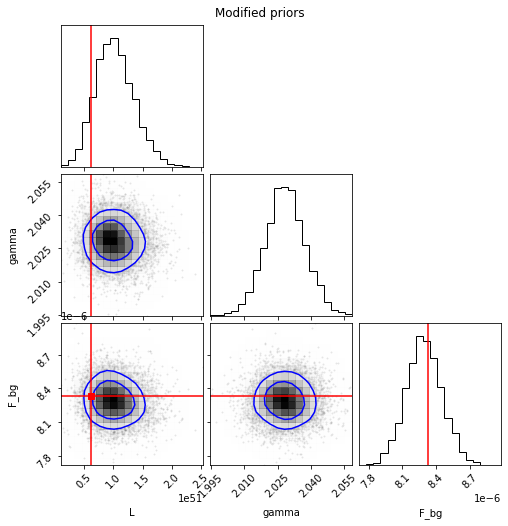

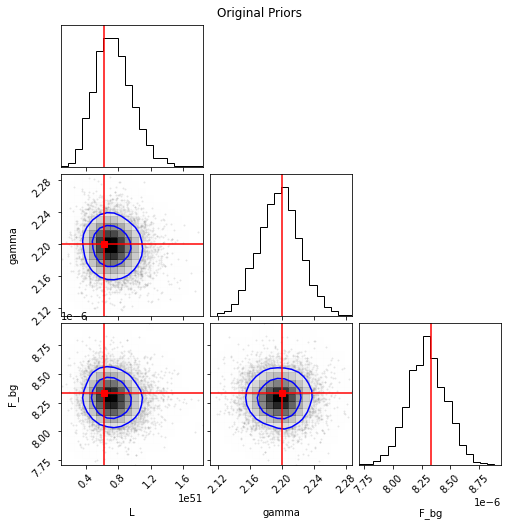

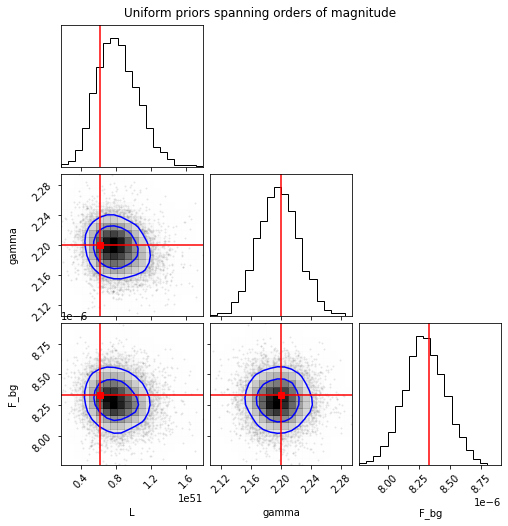

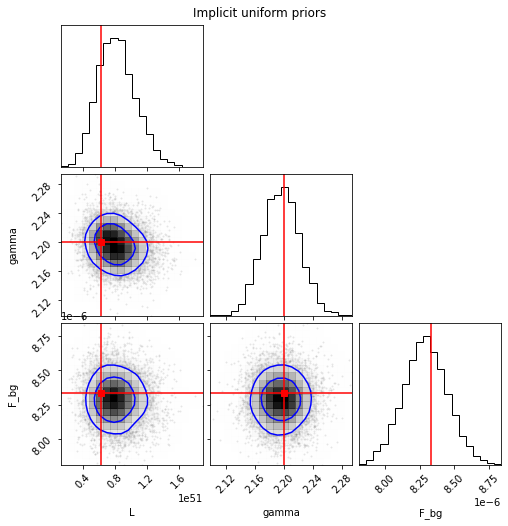

In [11]:
vnames = ['L','gamma','F_bg']
titles = [f'Modified priors',
    f'Original Priors',
    f'Uniform priors spanning orders of magnitude',
    f'Implicit uniform priors']

for i,bh in enumerate([bhmop, bhm, bhmup, bhmip]):
    fig,ax = plt.subplots(3,3, figsize=(7.5,7.5))
    bh.plot_corner(vnames, [sim.truth[nam] for nam in vnames], truth_color='r',
    smooth=True, levels=(.393,.68,), contour_kwargs={'colors':'b'}, fig =fig)
    plt.suptitle(titles[i])
    plt.show()




In [12]:
bhmop.print_diagnostic()

INFO:cmdstanpy:Processing csv files: /tmp/tmp_t_i5ibs/toy_bhm_otherpriors-202105111932-1-1p5nweqq.csv, /tmp/tmp_t_i5ibs/toy_bhm_otherpriors-202105111932-2-3khfei2l.csv, /tmp/tmp_t_i5ibs/toy_bhm_otherpriors-202105111932-3-u9xtgcbi.csv, /tmp/tmp_t_i5ibs/toy_bhm_otherpriors-202105111932-4-4swnsda2.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


In [13]:
import corner

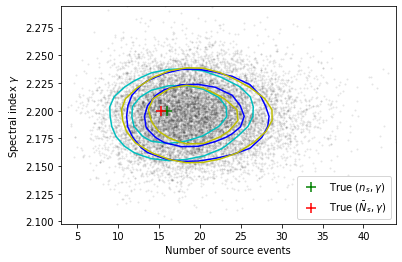

In [14]:
cols=['c','m','b','y']
fig, ax = plt.subplots()
for i,bh in enumerate([bhm, bhmop, bhmup, bhmip]):
    corner.hist2d(bh.fit.stan_variable('Nex_ps'),
        bh.fit.stan_variable('gamma'),
        smooth=True,
        levels=(.39,.68),
        plot_density = False,
        #data_kwargs = {'label':'Stan chain samples'},
        no_fill_contours = True,
        contour_kwargs={'colors':cols[i], 'alpha':1}
    )
plt.scatter(sum(sim.labels==0),sim.truth['gamma'], s=100, marker='+', c='g', label='True $(n_s,\gamma)$')
plt.scatter(sim.Nex_ps, sim.truth['gamma'],s=100 , marker='+', c='r', label = r'True $(\bar{N}_s,\gamma)$')
plt.legend()
plt.ylabel(r'Spectral index $\gamma$')
plt.xlabel(r'Number of source events')

# fig.set_size_inches((fig.get_size_inches()[0]*2,fig.get_size_inches()[1]*2))
plt.show()